In [1]:
import gpytorch
import numpy as np
import pandas as pd
import torch
from datetime import datetime

from bo_functions import bo_iter_w_runs
from bo_functions import find_train_doc_path
from bo_functions import set_ep

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

/afs/crc.nd.edu/user/m/mcarlozo/.conda/envs/Toy_Problem_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
#Set Date and Time
dateTimeObj = datetime.now()
timestampStr = dateTimeObj.strftime("%d-%b-%Y (%H:%M:%S)")
print("Date and Time: ", timestampStr)
DateTime = dateTimeObj.strftime("%Y/%m/%d/%H-%M-%S%p")
DateTime = None ##For Testing

#Set Parameters
BO_iters = 2
runs = 1

Theta_True = np.array([1,-1])
train_iter = 300
noise_std = 0.1
shuffle_seed = 9

sep_fact = 1
set_lengthscale = None

emulator = True
sparse_grid = False
obj = "LN_obj"

verbose = True
save_fig = False

# Find Optimal Exploration Parameter Value and set len_data
if emulator == True:
    t = 100
else:
    t = 20
    
explore_bias = set_ep(emulator, obj, sparse_grid)
ep = torch.tensor([float(explore_bias)])

#Pull Experimental data from CSV
exp_data_doc = '../Input_CSVs/Exp_Data/n=5.csv'
exp_data = np.array(pd.read_csv(exp_data_doc, header=0,sep=","))
Xexp = exp_data[:,1]
Yexp = exp_data[:,2]
n = len(Xexp)

#Define GP Testing space
p=20
Theta1 =  np.linspace(-2,2,p) #1x10
Theta2 =  np.linspace(-2,2,p) #1x10
theta_mesh = np.array(np.meshgrid(Theta1, Theta2)) #2 Uniform 5x5 arrays

Date and Time:  15-Sep-2022 (11:33:29)


Runs: 1
BO Iters: 2
----------------------------------------------------
Separation Factor Train/Test: 1
Lengthscale Set To: None
Initial Explore Bias: 1.0
Run Number:  1


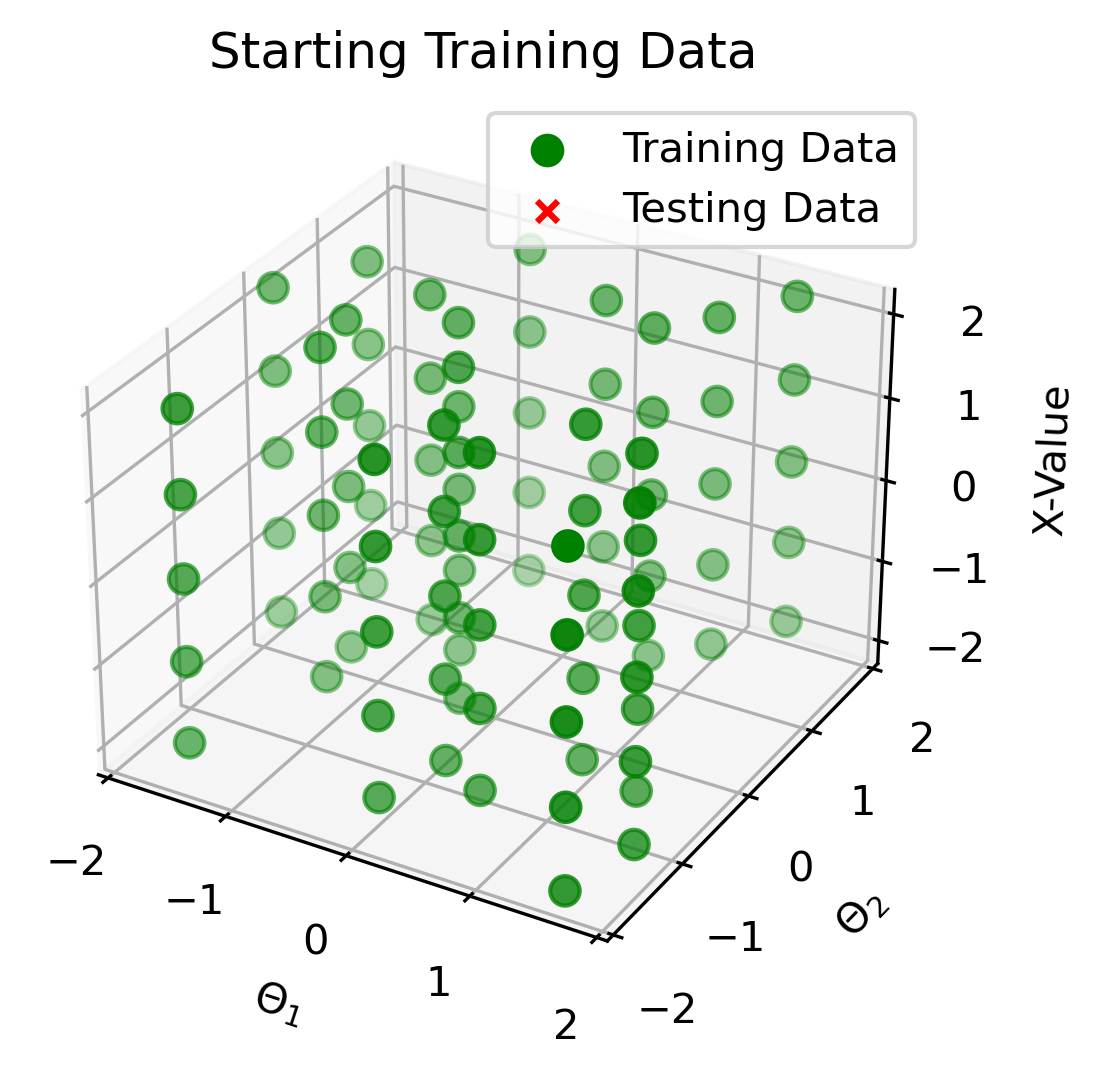

BO Iteration =  1
Exploration Bias Factor =  tensor([1.])
Scipy Theta Best =  [ 0.73684211 -0.94736842]
Argmax Theta Best =  [ 0.73684211 -0.94736842]
Scipy Theta Opt =  [ 0.78260045 -0.96536033]
Argmin Theta_Opt_GP =  [ 0.73684211 -0.94736842]
EI_max = 10.967564582824707 



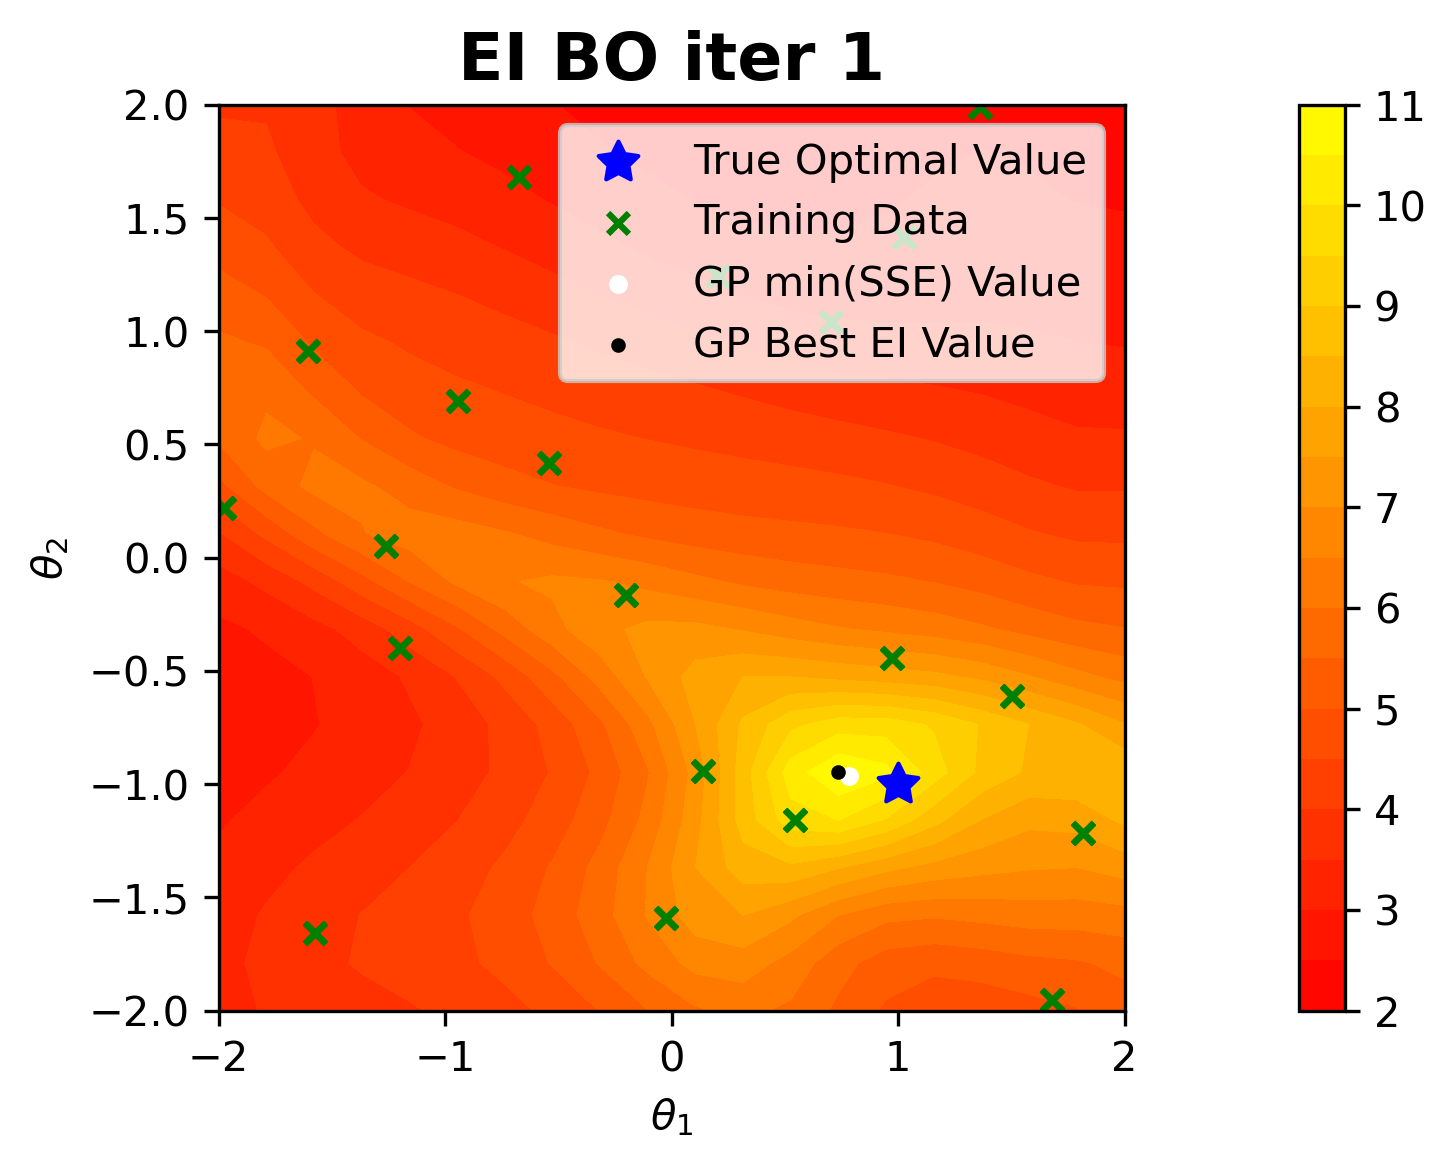

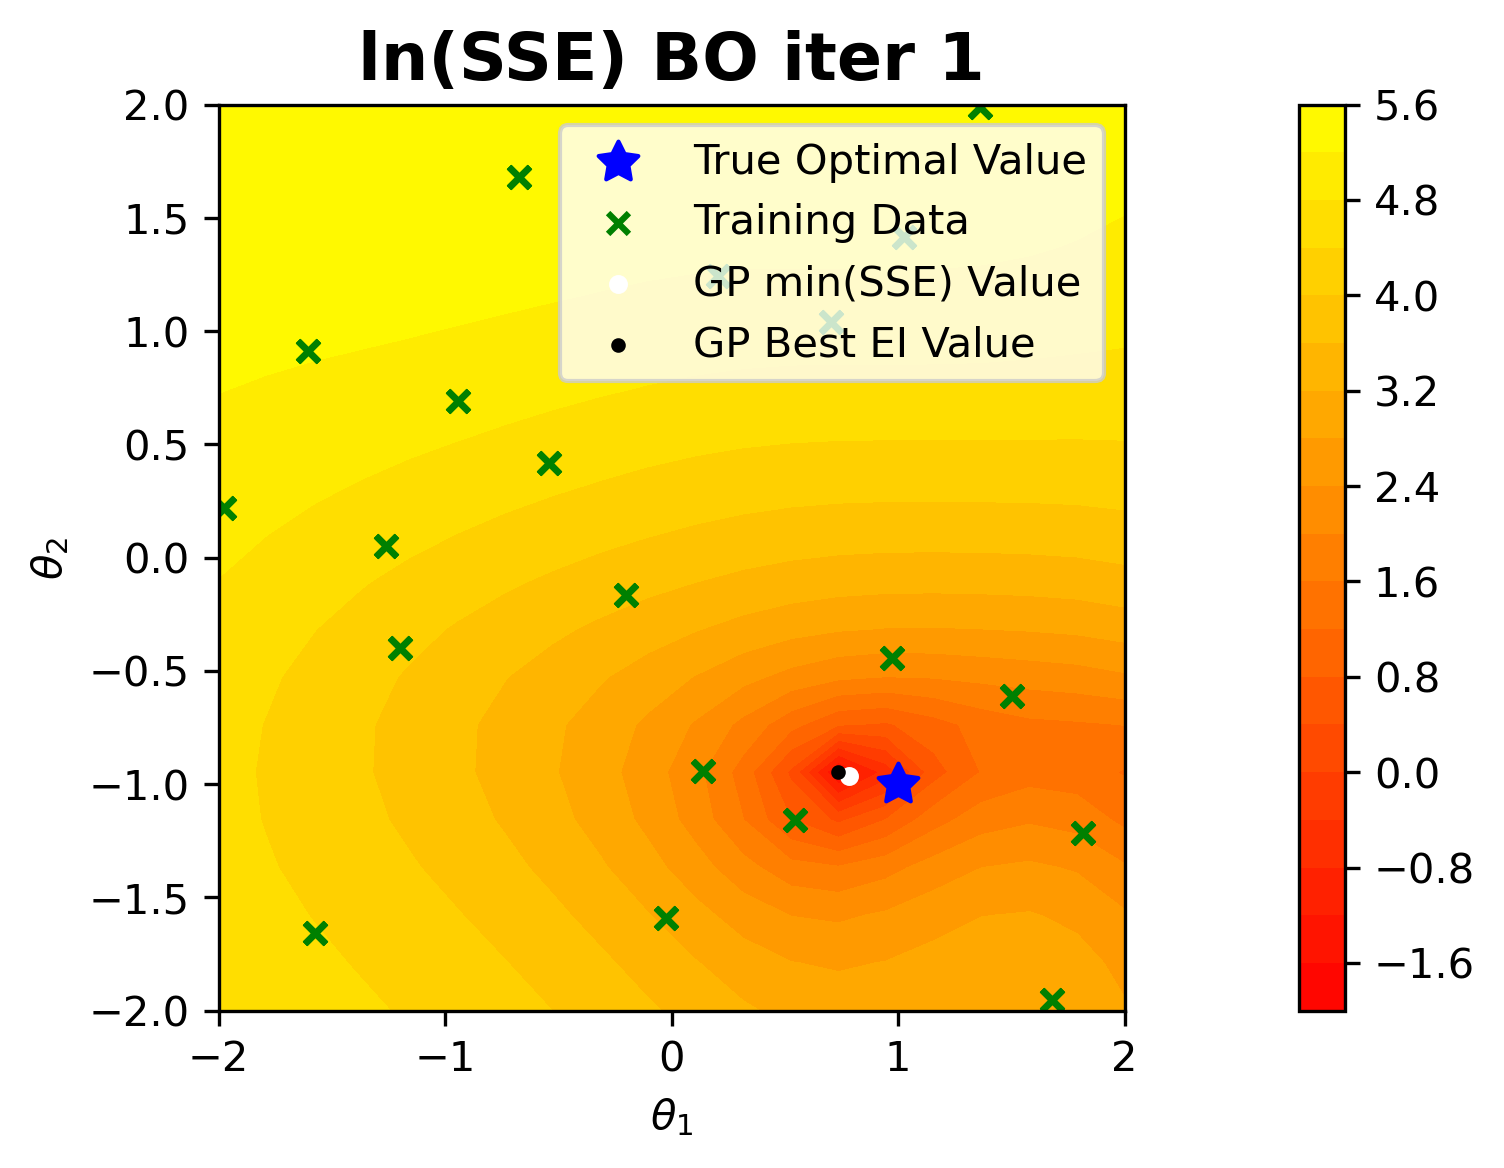

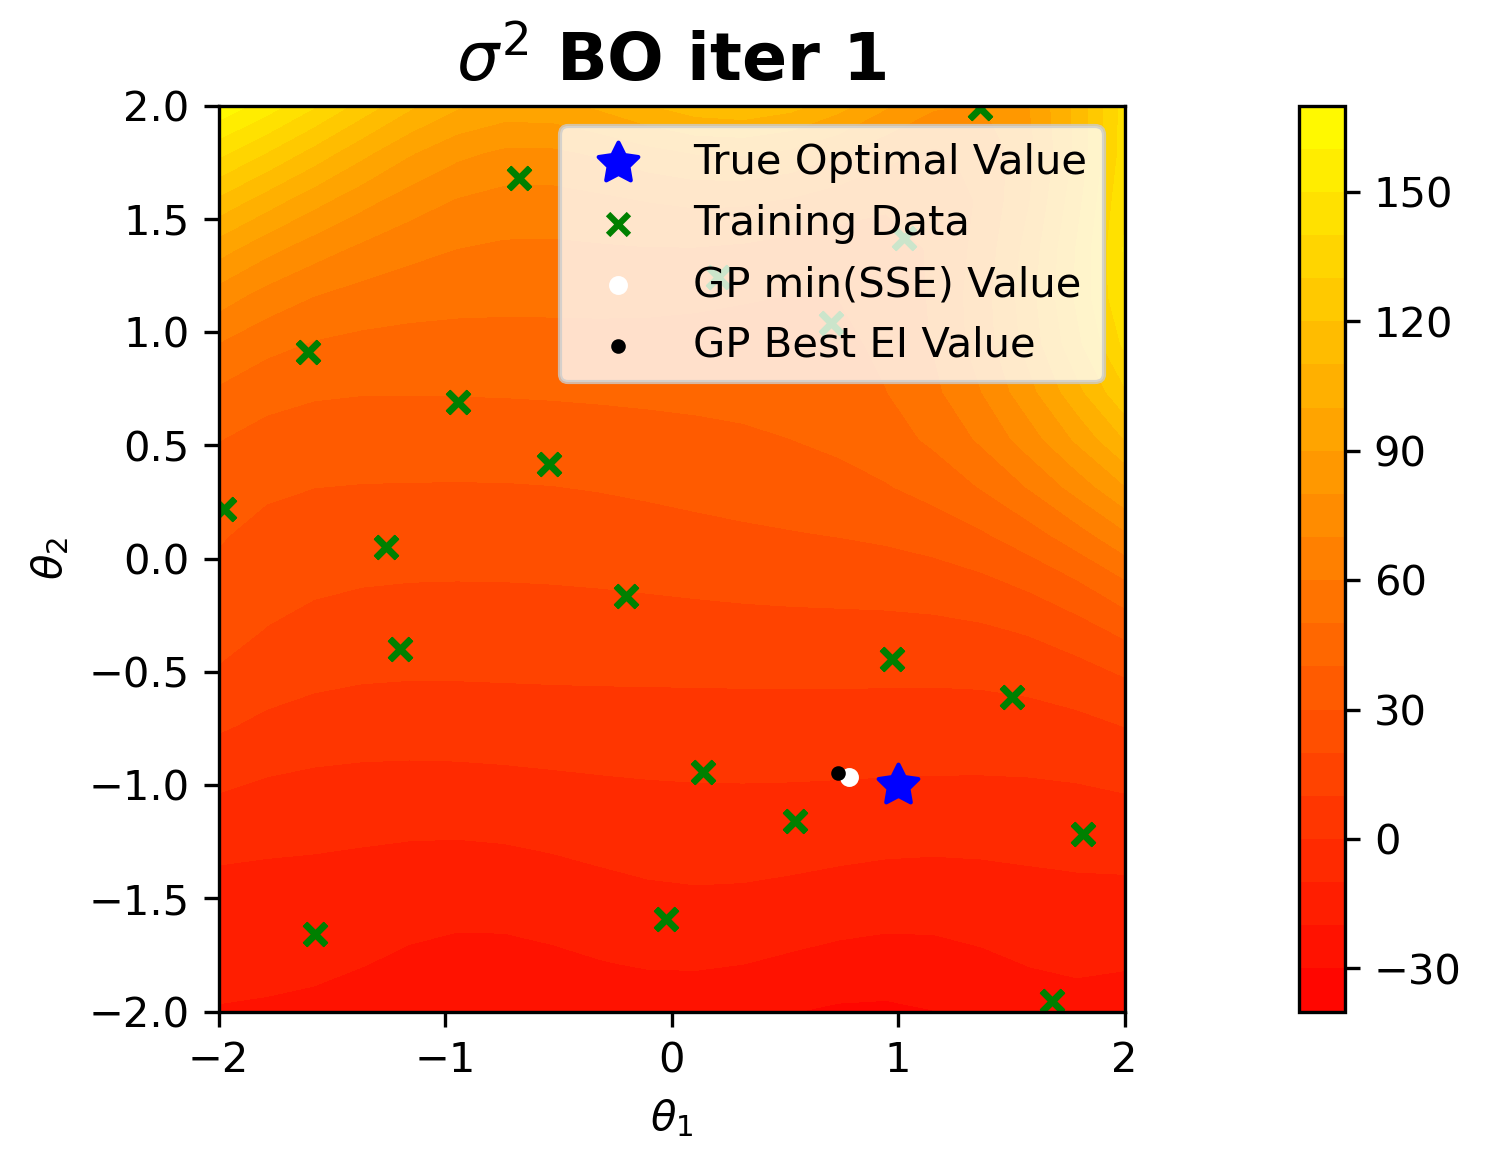

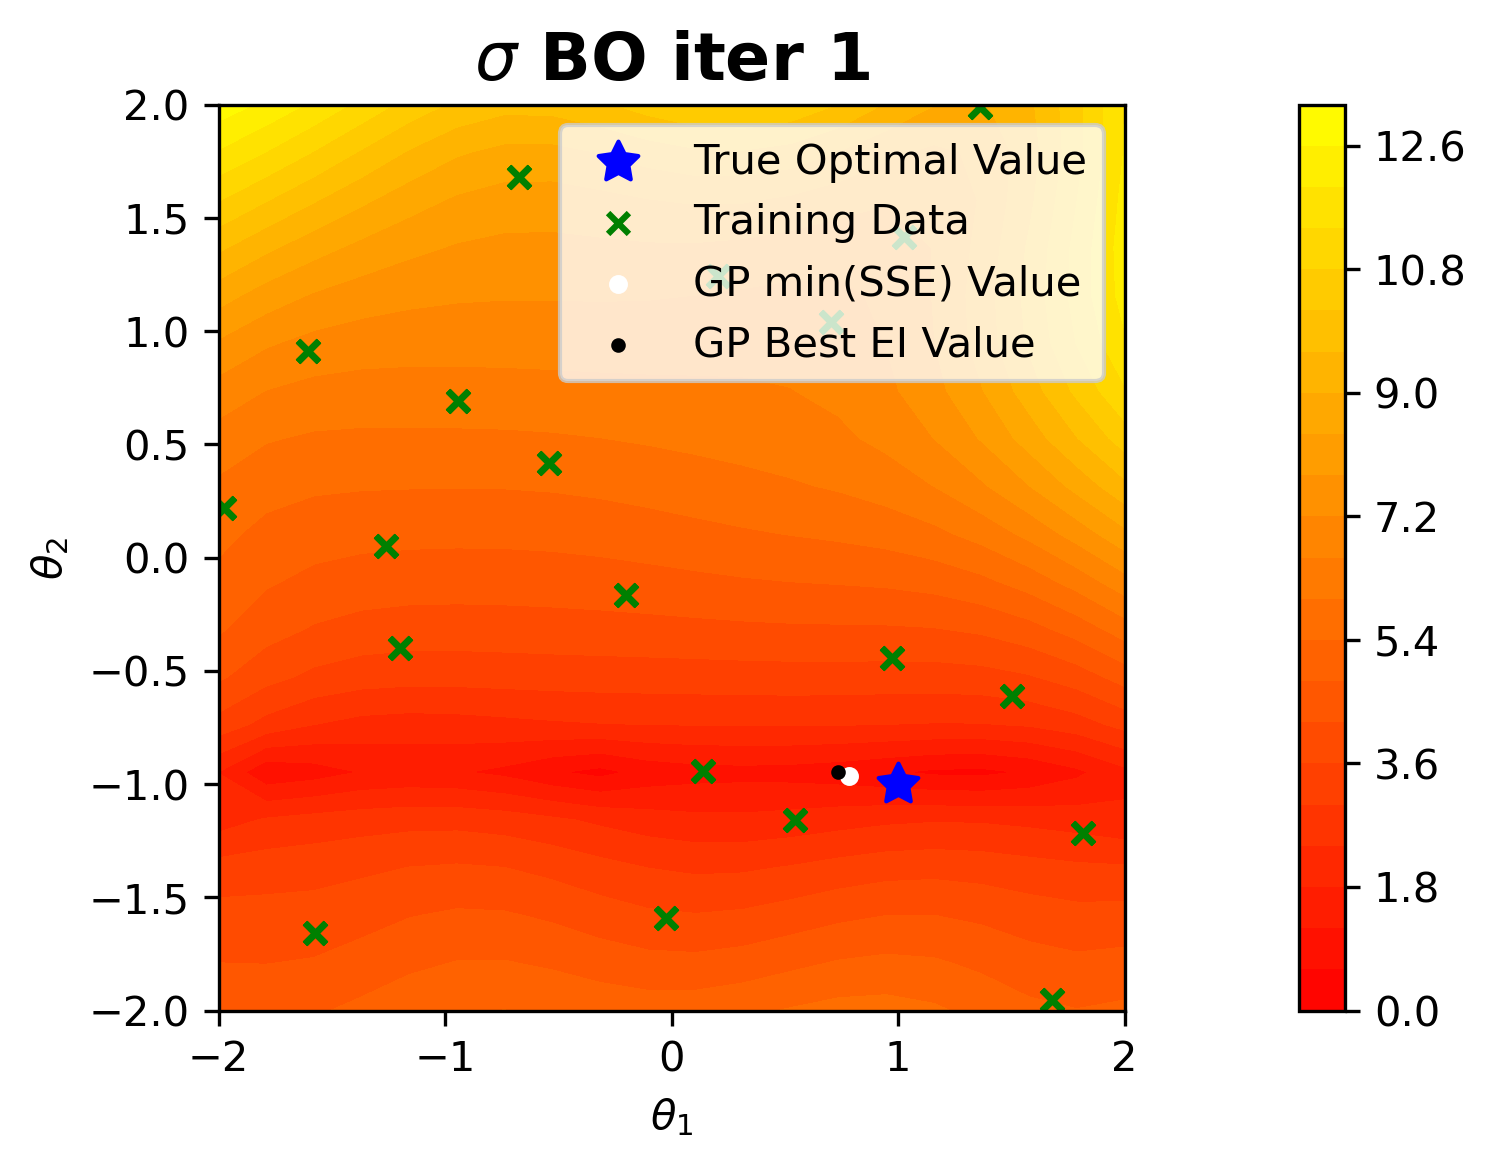

Best Error is: 1.0376
Magnitude of ln(SSE) given Theta_Opt =  [ 0.78260045 -0.96536033] is -7.0104e-01
BO Iteration =  2
Exploration Bias Factor =  tensor([1.])
Scipy Theta Best =  [ 0.94736842 -0.94736842]
Argmax Theta Best =  [ 0.94736842 -0.94736842]
Scipy Theta Opt =  [ 0.87820821 -0.97763124]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842]
EI_max = 13.120570182800293 



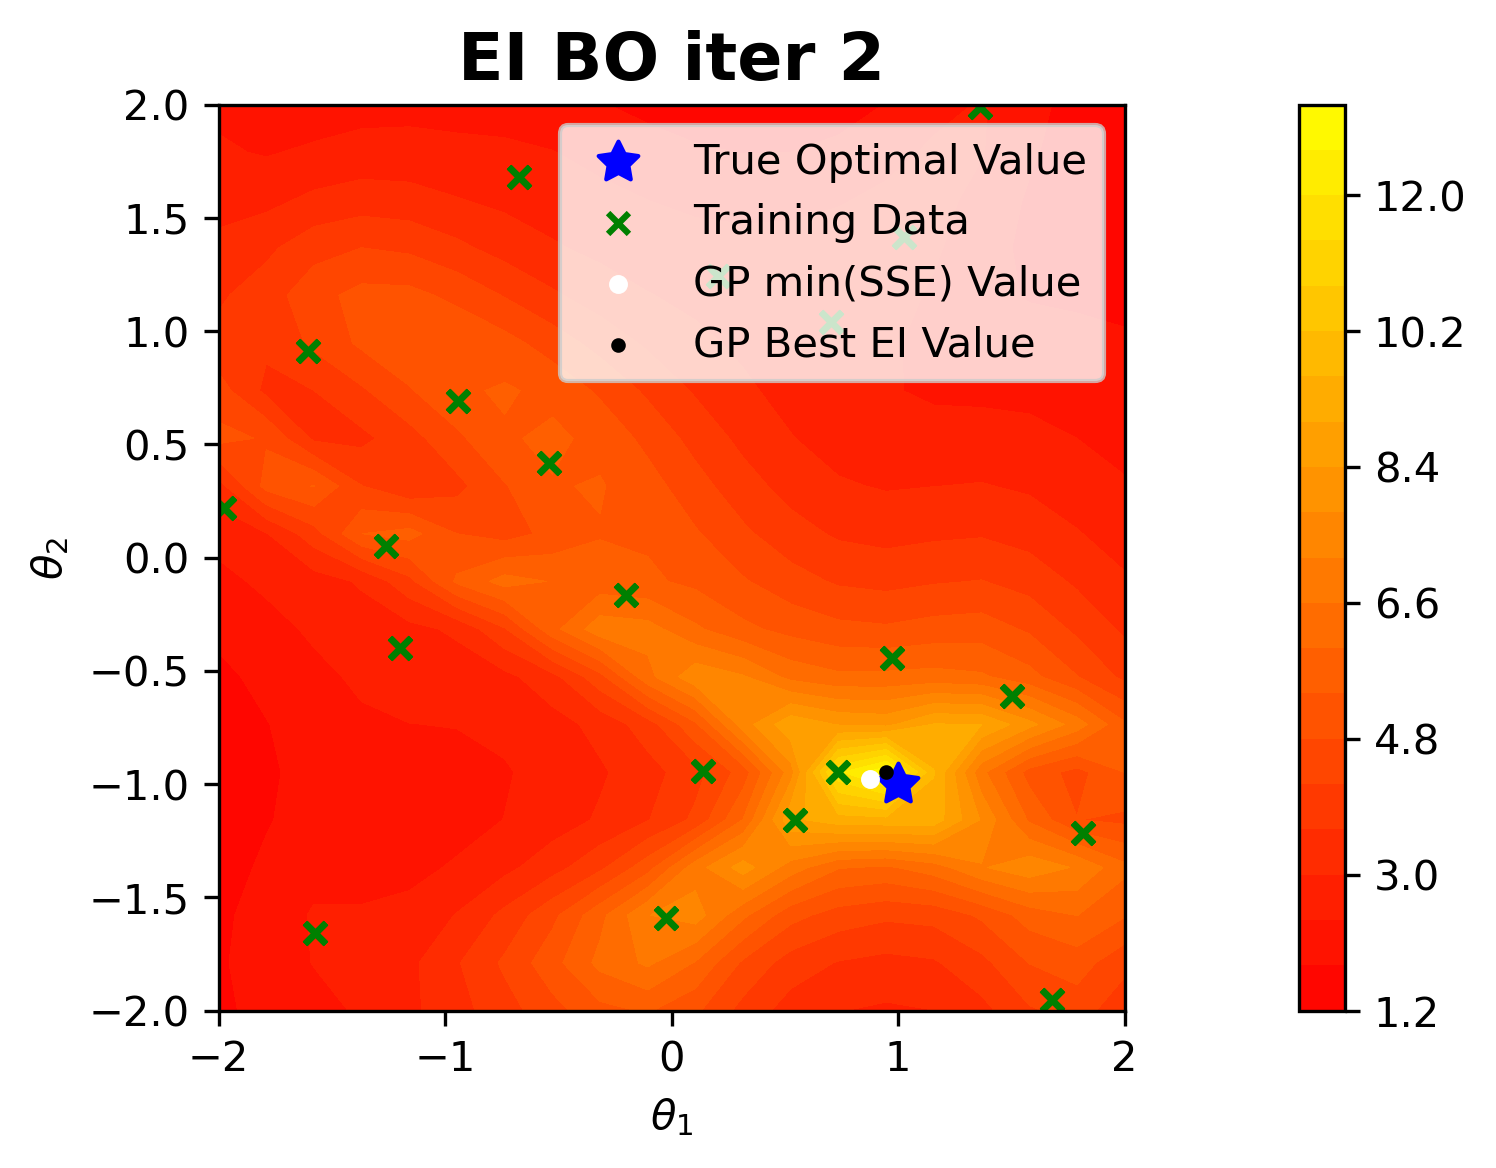

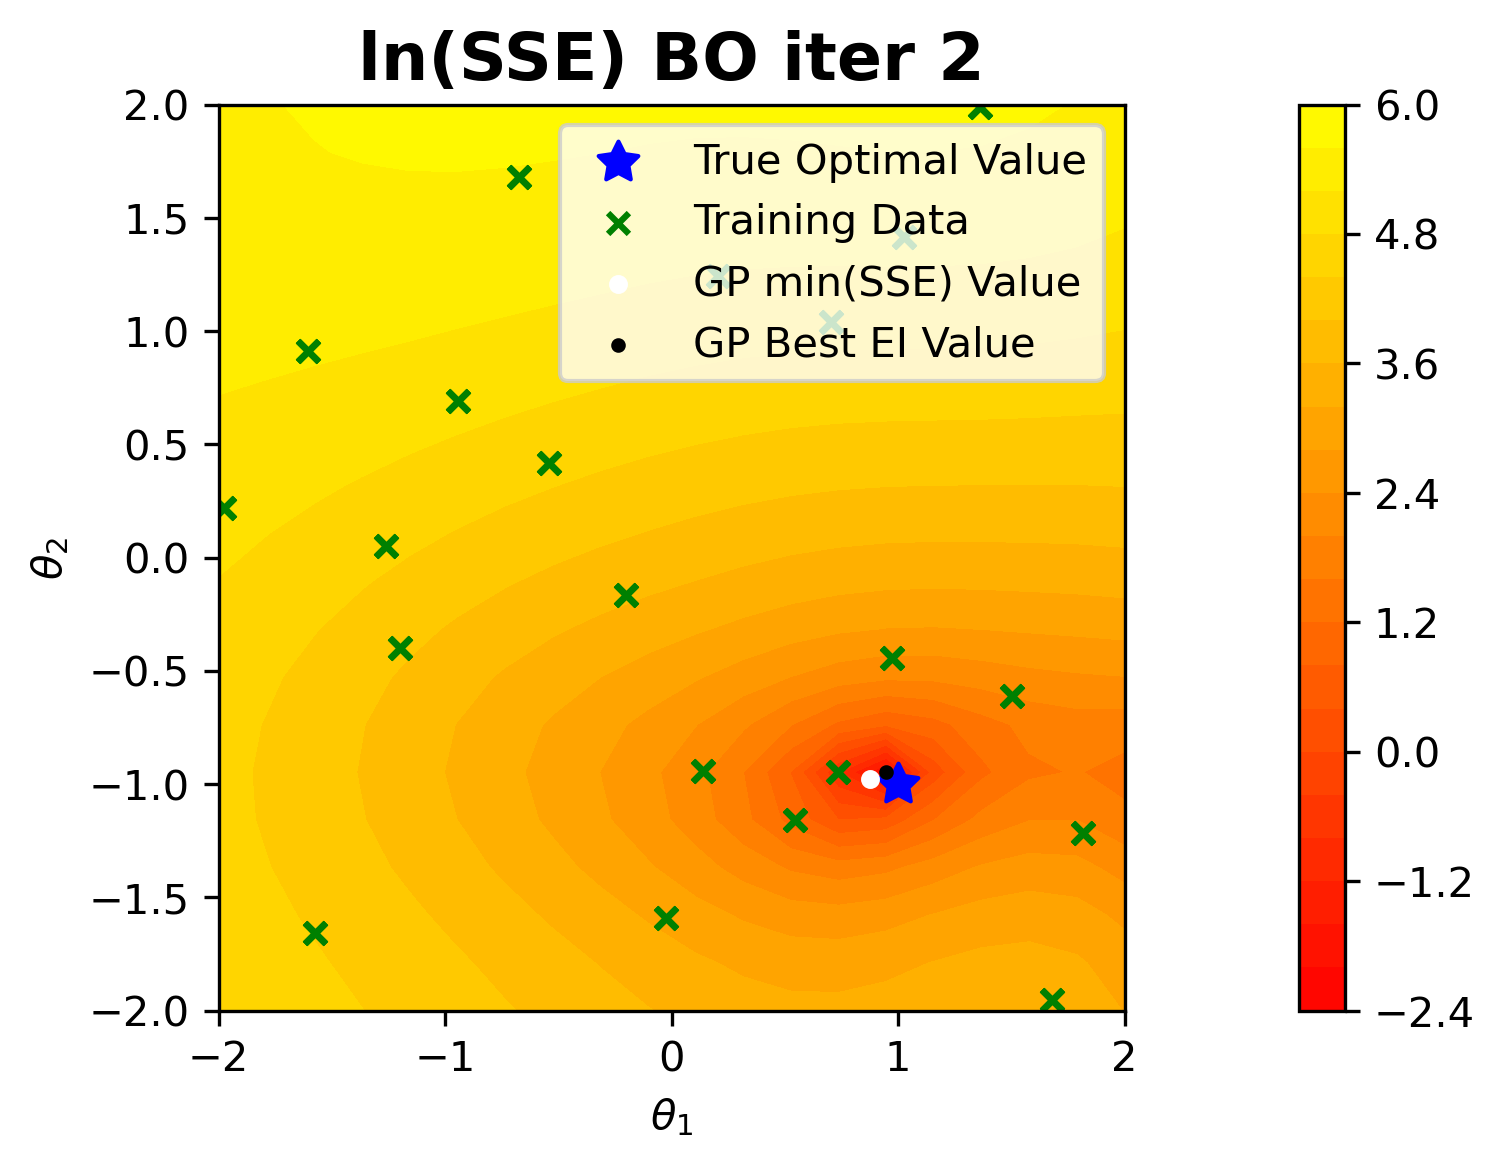

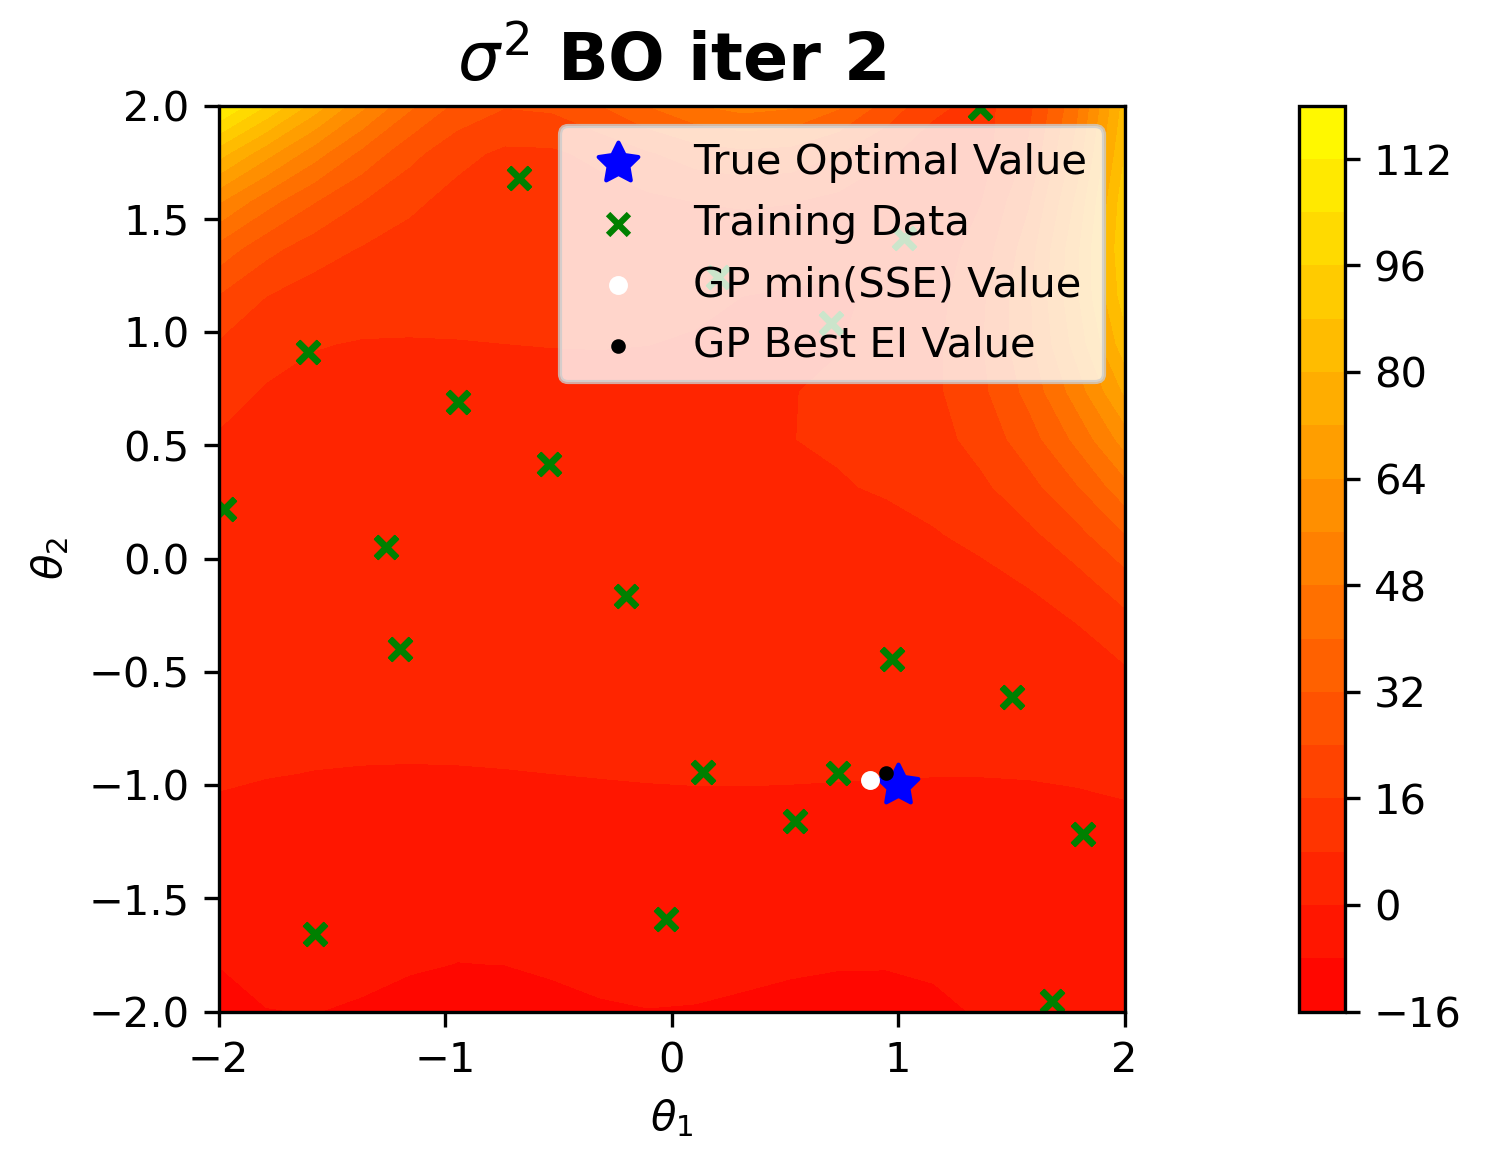

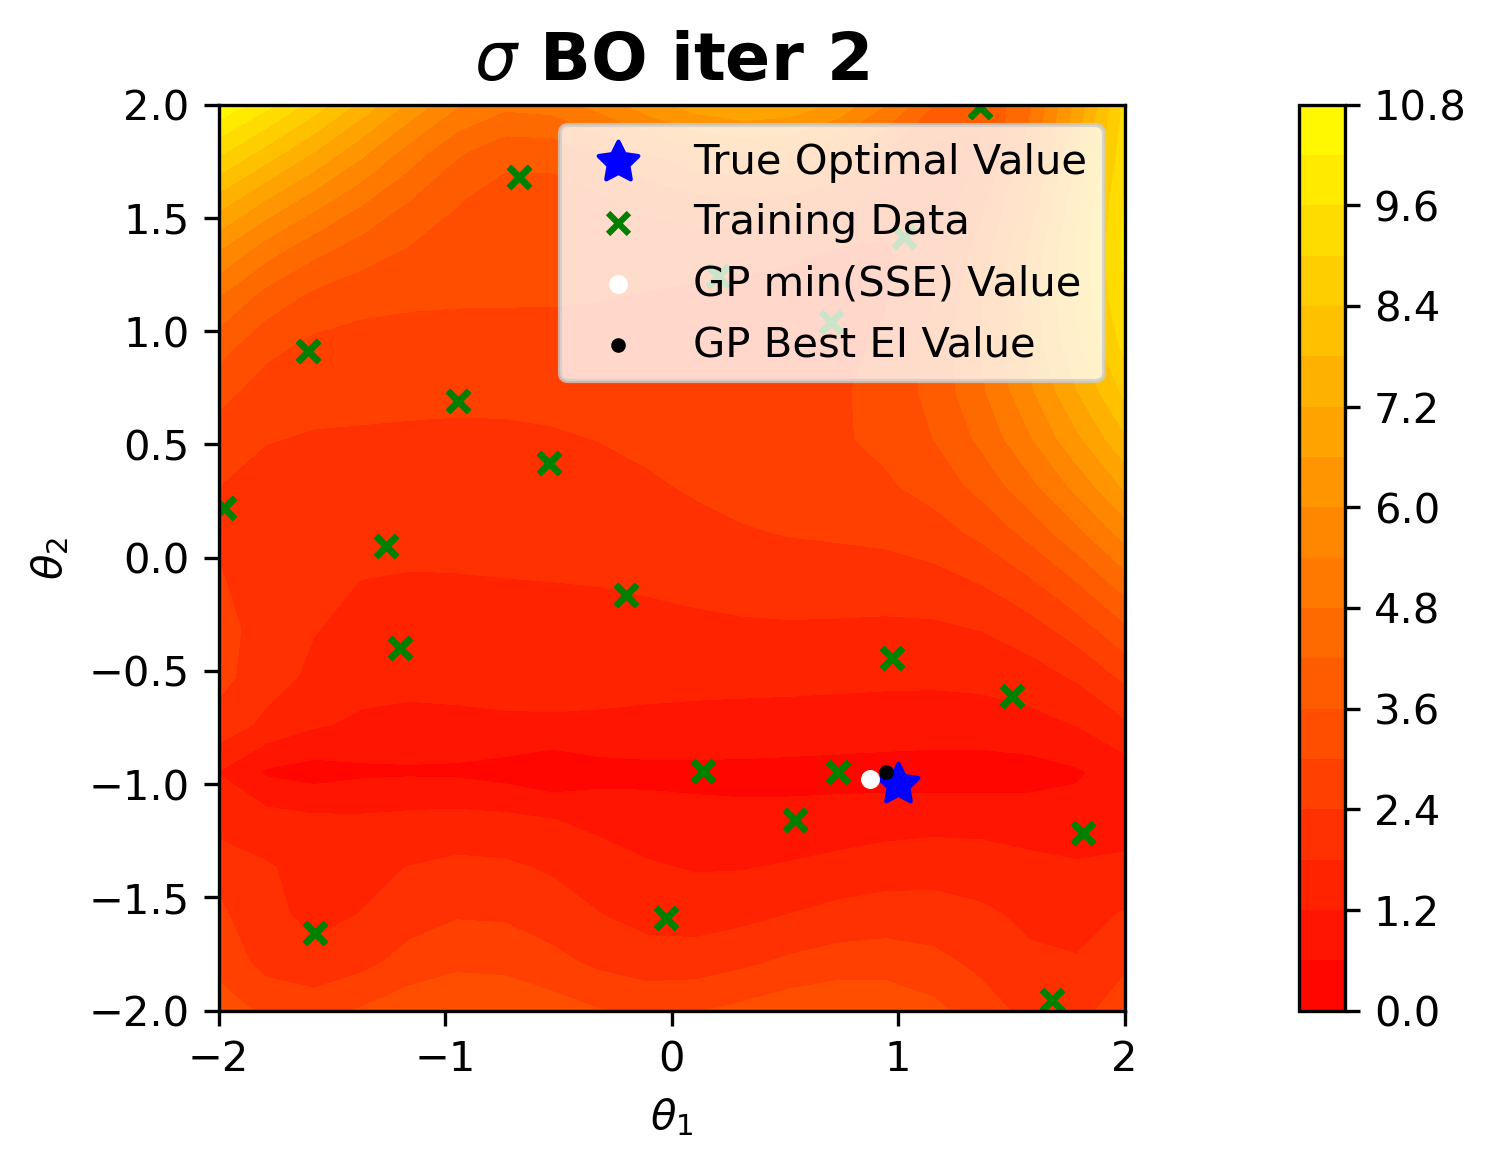

Best Error is: -0.264
Magnitude of ln(SSE) given Theta_Opt =  [ 0.87820821 -0.97763124] is -1.8538e+00


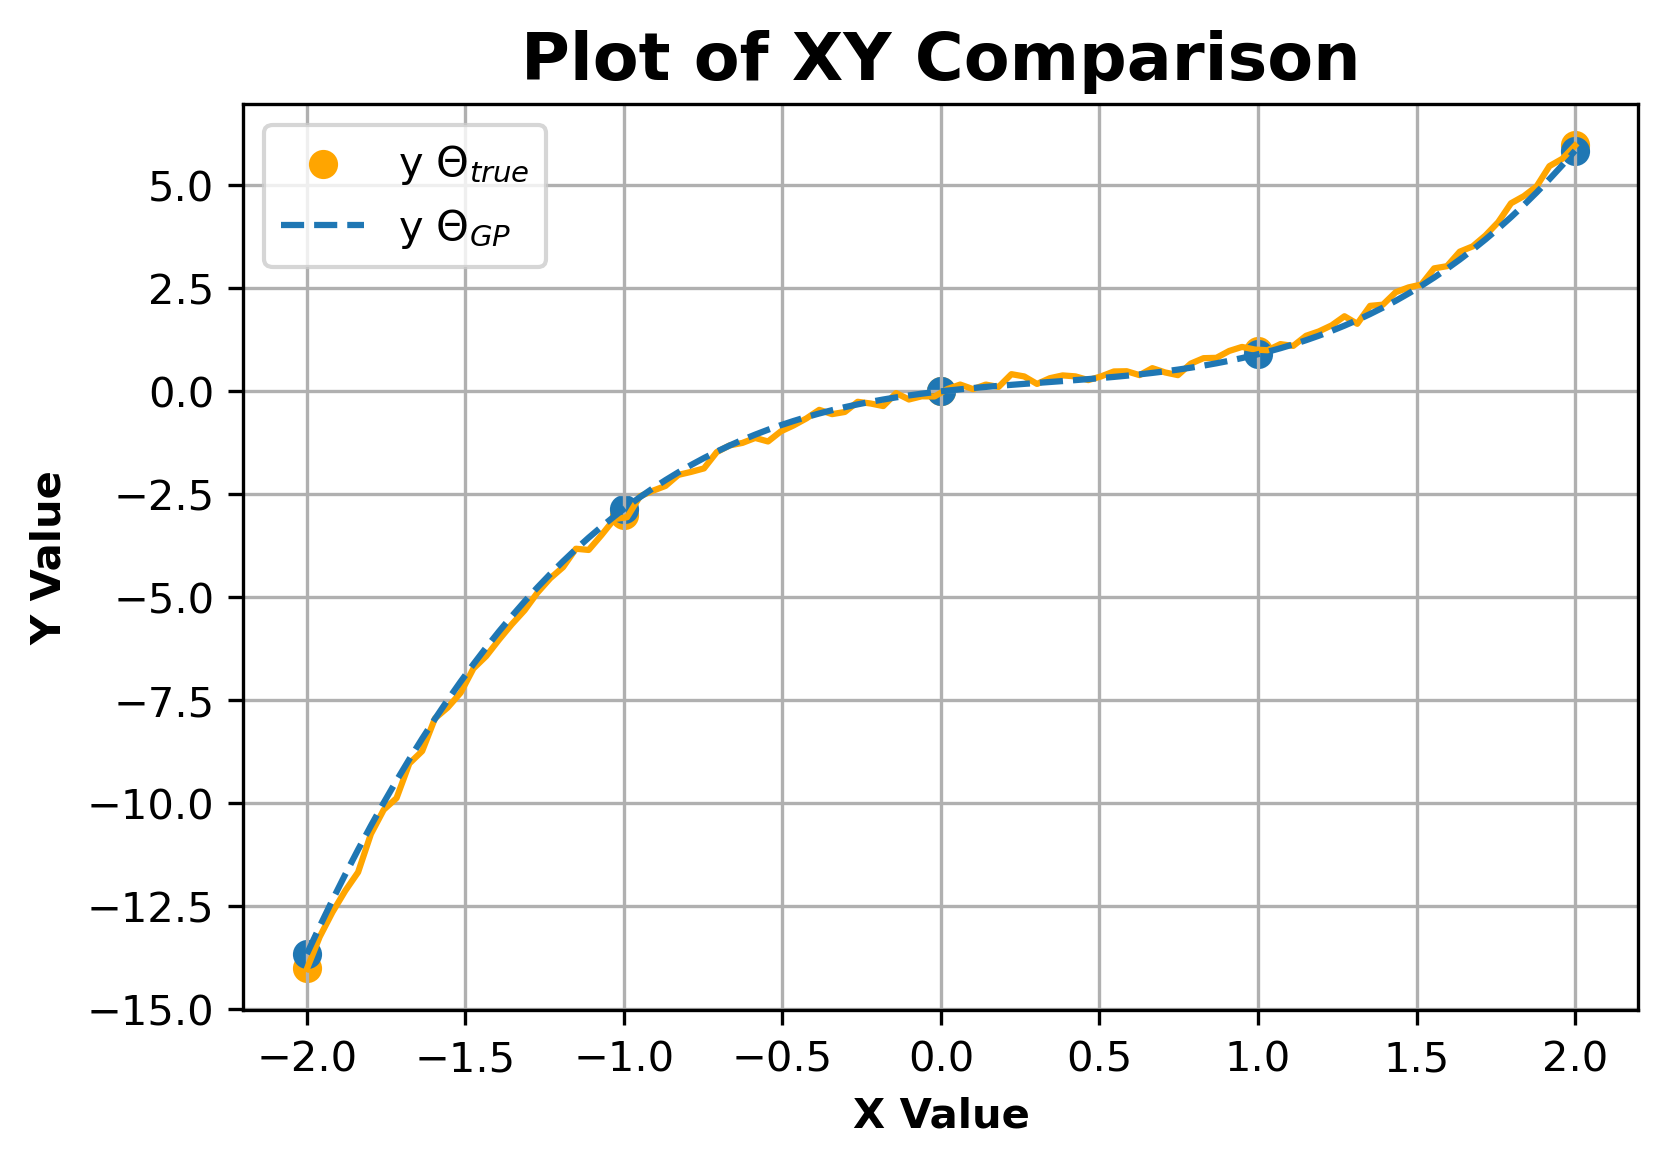

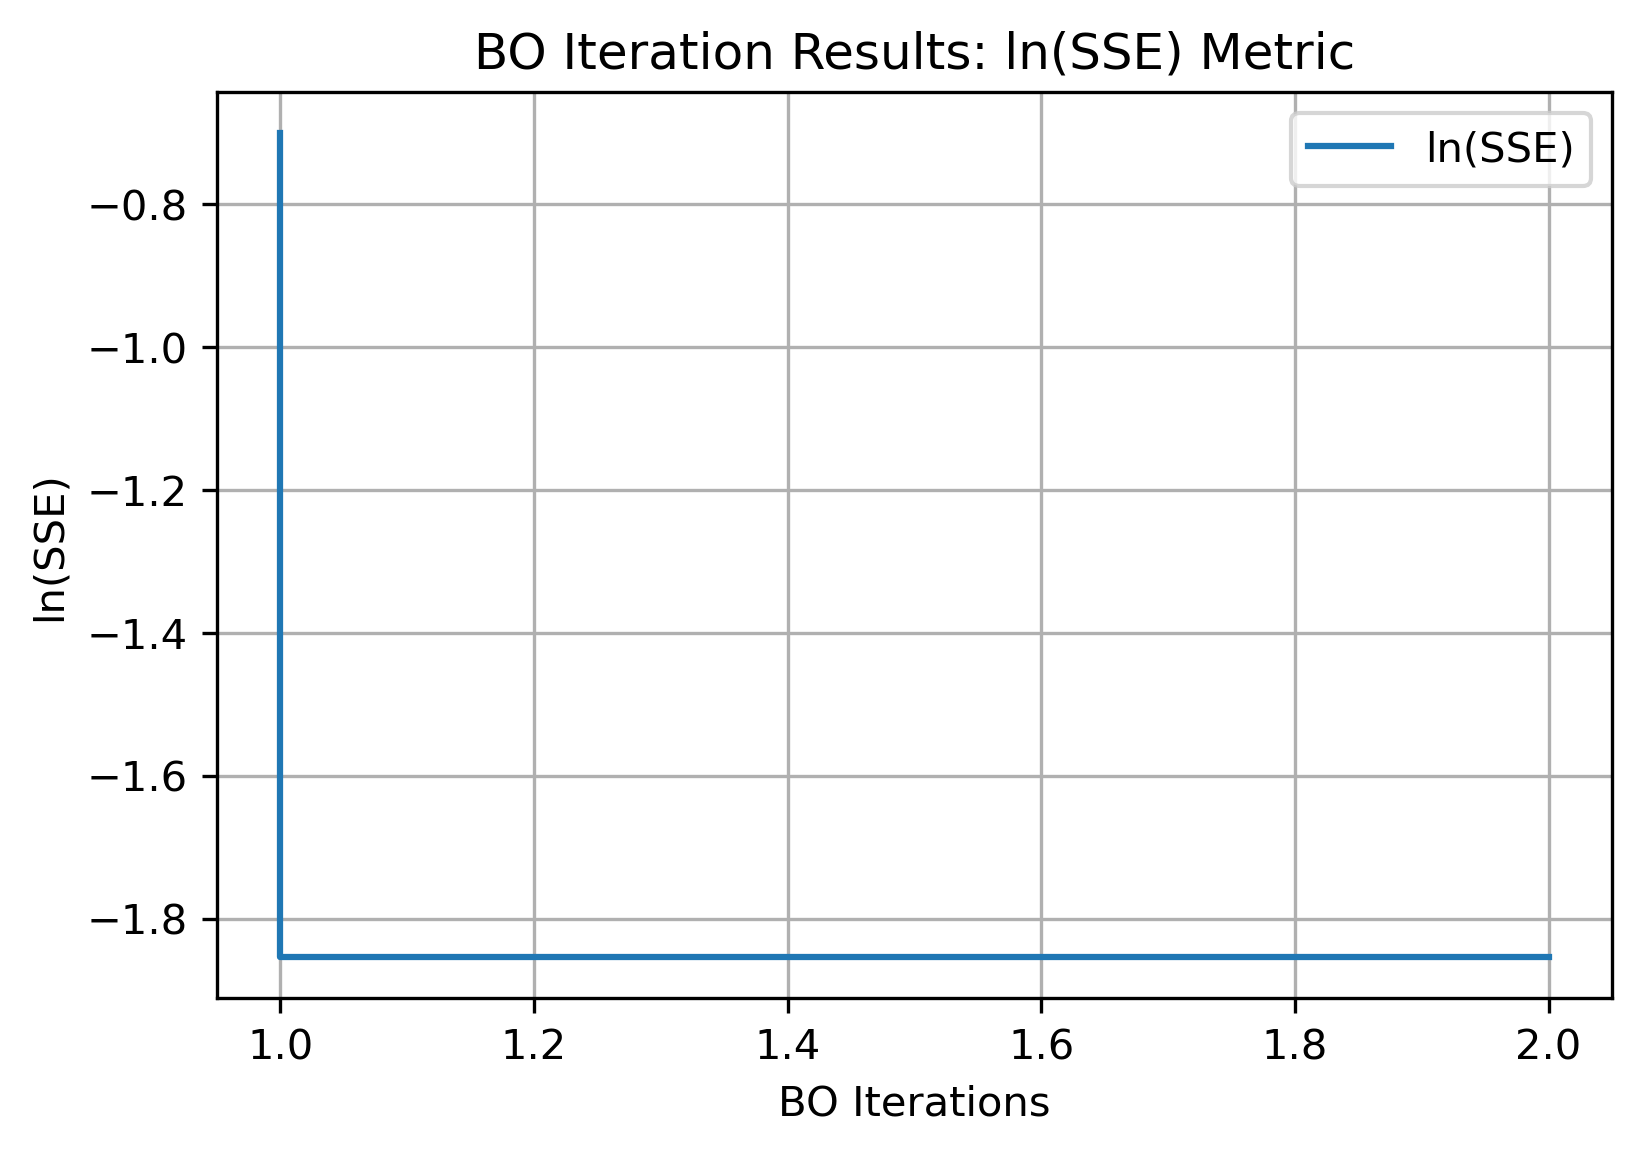

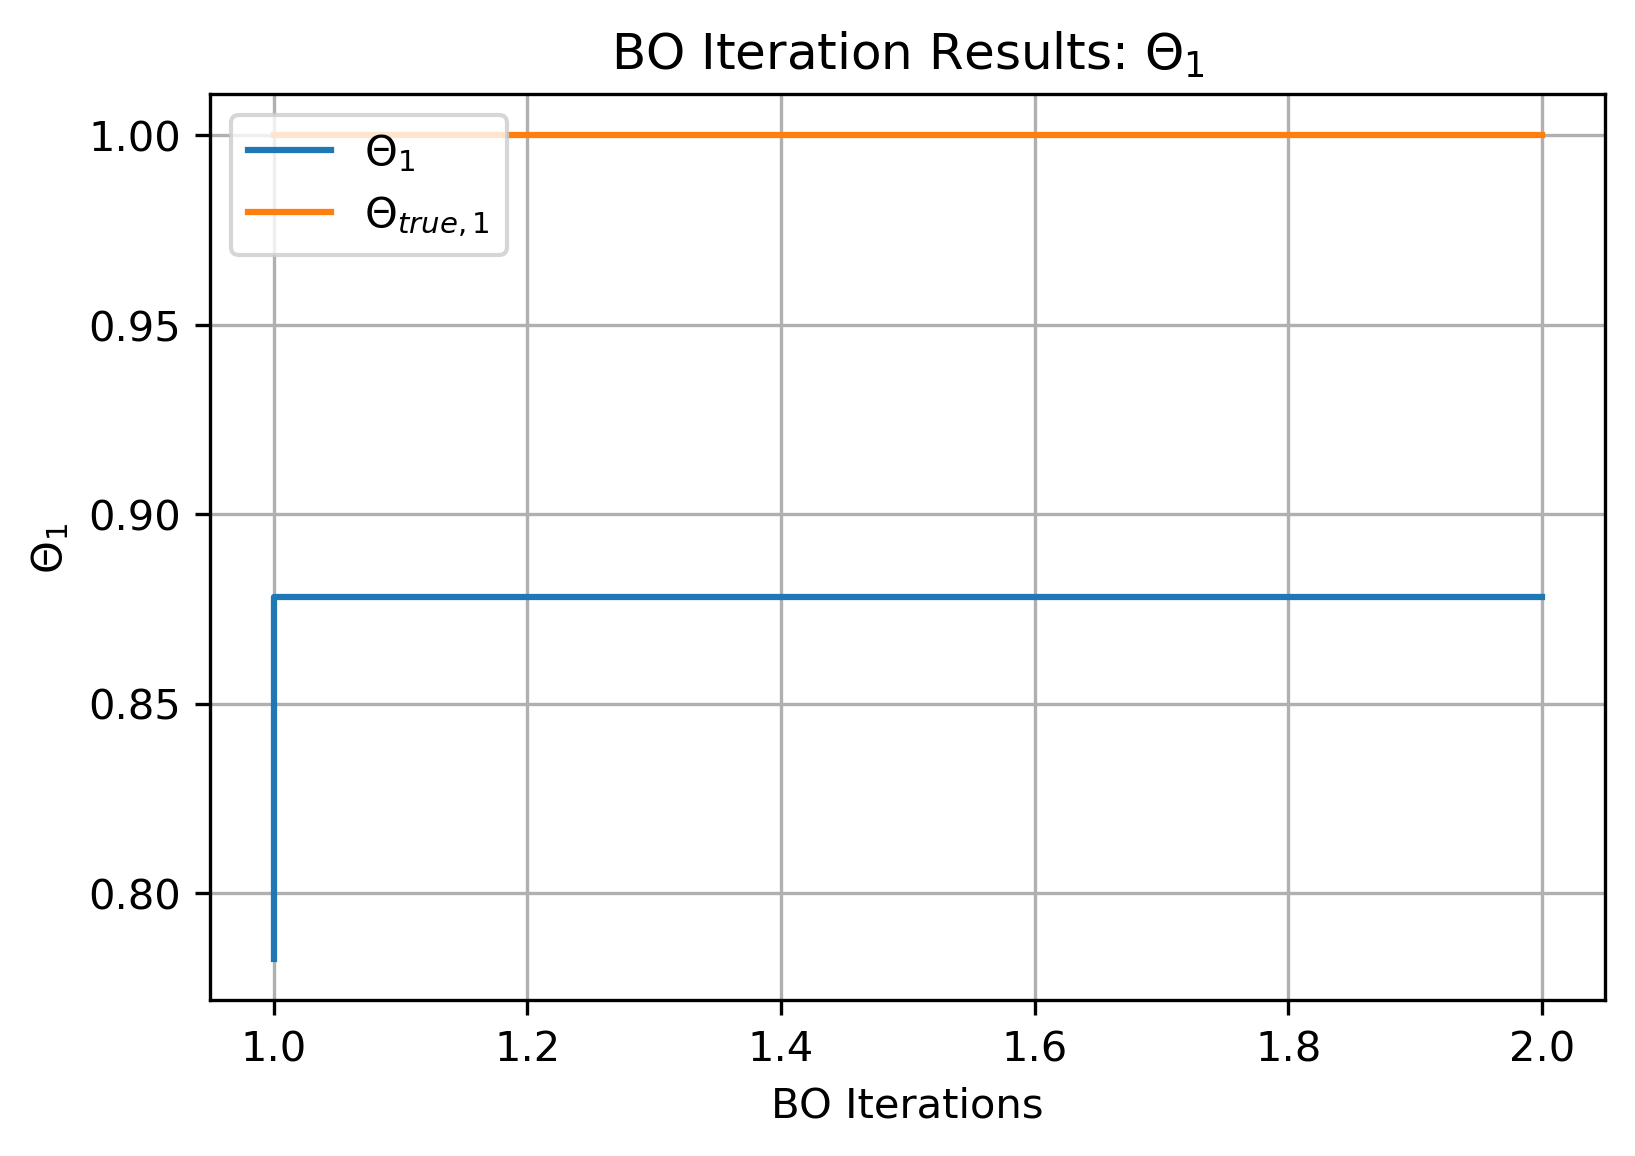

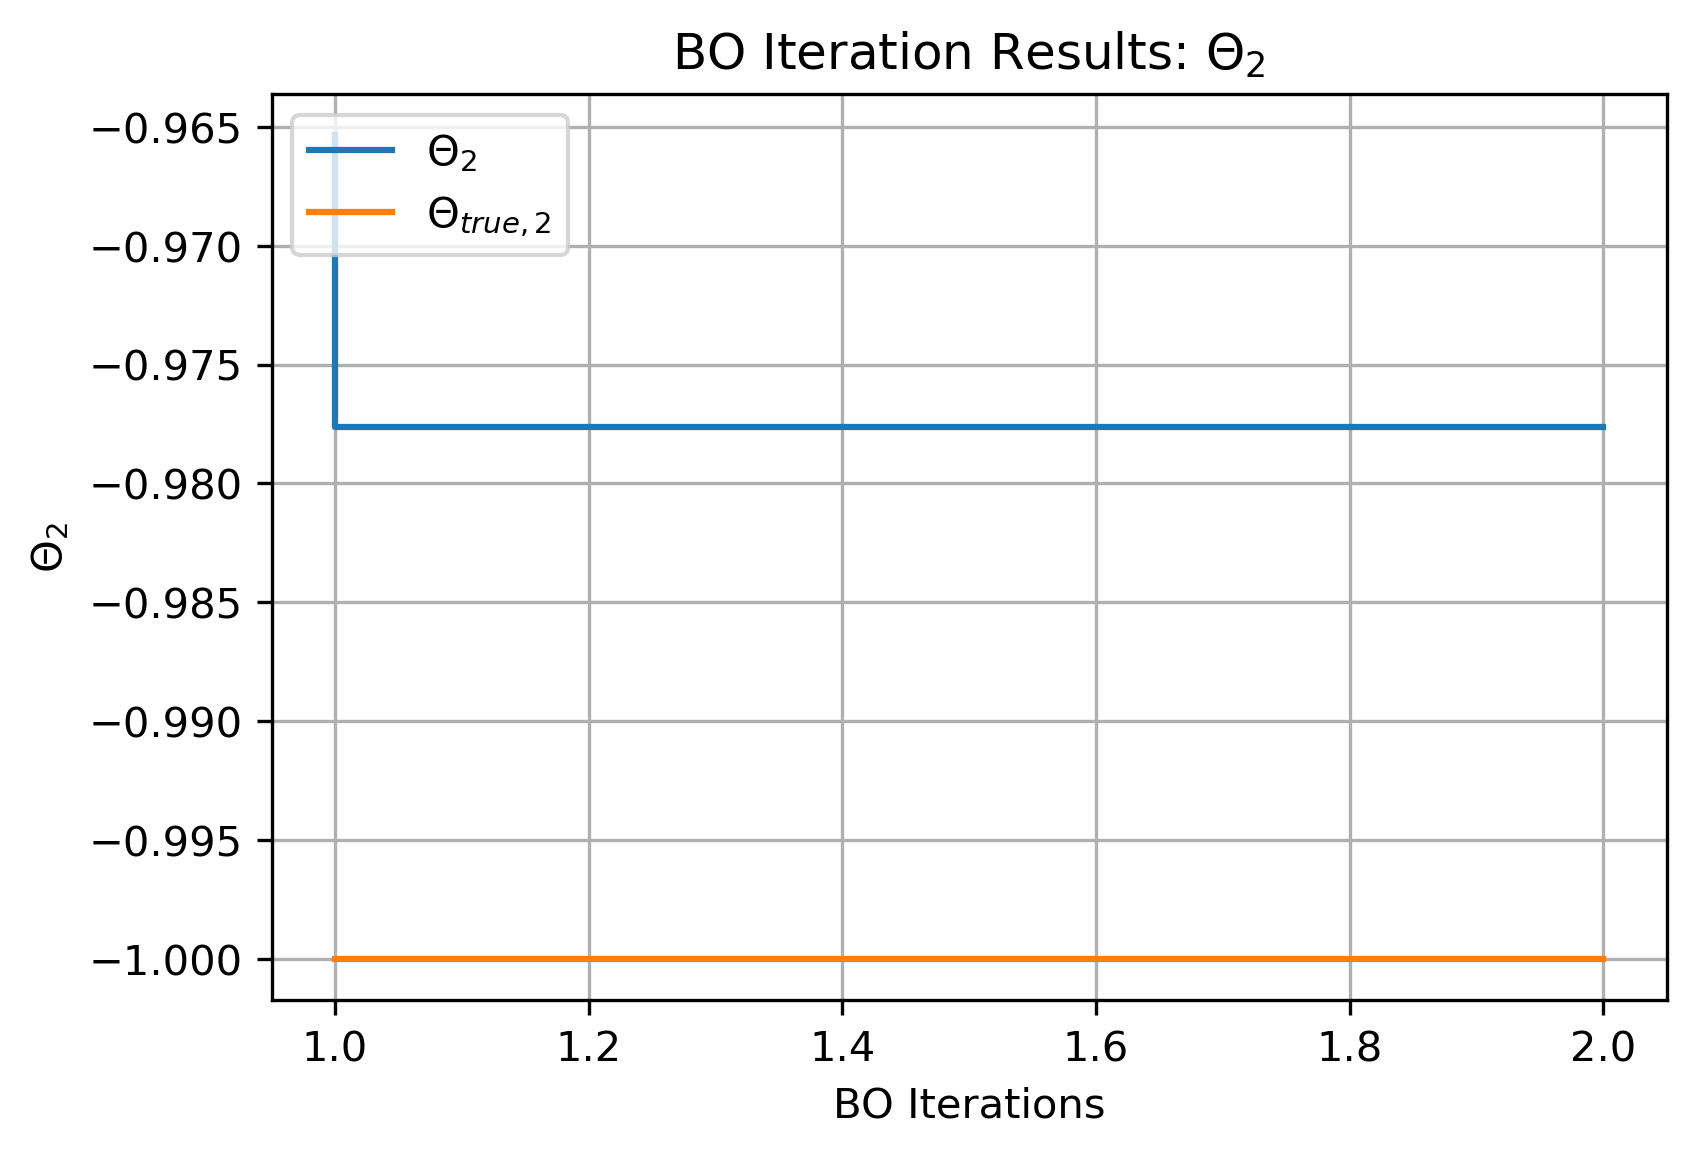

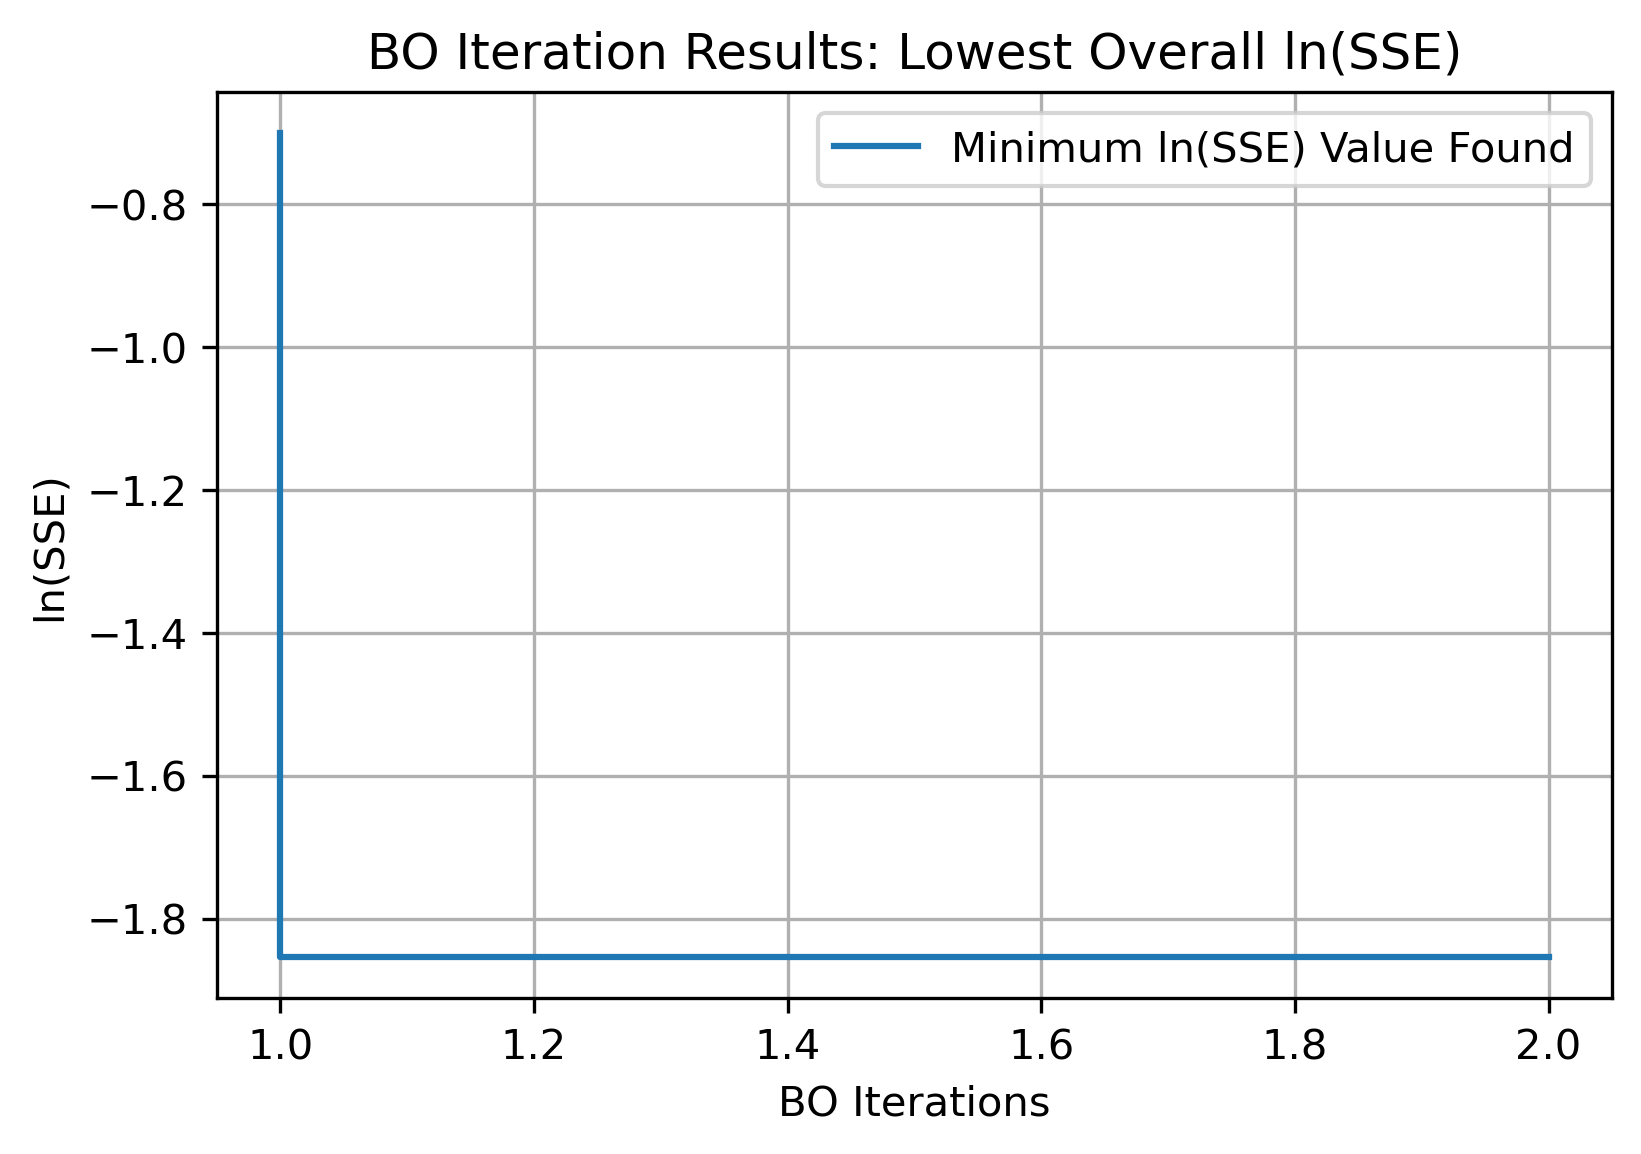

The GP predicts the lowest SSE of 1.566e-01 occurs at θ = [ 0.87820821 -0.97763124] during run 1 at BO iteration 2
At this point, the highest EI occurs at θ = [ 0.94736842 -0.94736842]


CPU times: user 3min 46s, sys: 599 ms, total: 3min 46s
Wall time: 3min 47s


In [5]:
%%time
all_data_doc = find_train_doc_path(emulator, obj, t)
all_data = np.array(pd.read_csv(all_data_doc, header=0,sep=",")) 

print("Runs:", runs)
print("BO Iters:", BO_iters)
print("----------------------------------------------------")
print("Separation Factor Train/Test:", str(np.round(sep_fact,3)))
print("Lengthscale Set To:", set_lengthscale)
print("Initial Explore Bias:", str(np.round(float(ep),3)))
results = bo_iter_w_runs(BO_iters,all_data_doc,t,theta_mesh,Theta_True,train_iter,ep, Xexp, Yexp,
                             noise_std, obj, runs, sparse_grid, emulator, set_lengthscale, verbose, 
                             save_fig, shuffle_seed, DateTime, sep_fact = sep_fact)
print("The GP predicts the lowest SSE of", "{:.3e}".format(np.exp(results[3])), "occurs at \u03B8 =", results[2][0], 
          "during run", results[1], "at BO iteration", results[0])
print("At this point, the highest EI occurs at \u03B8 =", results[4][0])
print("\n")